In [0]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
K.set_image_dim_ordering('th')

import os
import numpy as np
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [0]:
def imread(path):
    img = scipy.misc.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img

In [0]:
from google.colab import files

uploaded = files.upload()

Saving 101_ObjectCategories.zip to 101_ObjectCategories.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['101_ObjectCategories.zip']), 'r')
data.extractall()

In [0]:
data.printdir()

File Name                                             Modified             Size
101_ObjectCategories/airplanes/                2019-02-21 13:32:04            0
101_ObjectCategories/airplanes/image_0002.jpg  2004-11-09 11:59:06         8181
101_ObjectCategories/airplanes/image_0003.jpg  2004-11-09 11:59:06        11741
101_ObjectCategories/airplanes/image_0004.jpg  2004-11-09 11:58:54        15700
101_ObjectCategories/airplanes/image_0005.jpg  2004-11-09 11:58:54        14356
101_ObjectCategories/airplanes/image_0007.jpg  2004-11-09 11:58:54         9596
101_ObjectCategories/airplanes/image_0008.jpg  2004-11-09 11:58:54        13896
101_ObjectCategories/airplanes/image_0009.jpg  2004-11-09 11:59:06        10865
101_ObjectCategories/airplanes/image_0010.jpg  2004-11-09 11:58:54         8378
101_ObjectCategories/airplanes/image_0011.jpg  2004-11-09 11:58:54        10417
101_ObjectCategories/airplanes/image_0012.jpg  2004-11-09 11:58:54         6418
101_ObjectCategories/airplanes/image_001

In [0]:
import os
train_data_dir = '101_ObjectCategories'  

target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])  

nb_classes = len(target_names)

In [0]:
print('Training a CNN Multi-Classifier Model ......')
print('\n - names of classes: ', target_names, '\n - # of classes: ', nb_classes)
print(' - # of trained samples: ', nb_train_samples)

Training a CNN Multi-Classifier Model ......

 - names of classes:  ['sunflower', 'crayfish', 'euphonium', 'airplanes', 'schooner', 'lotus', 'car_side', 'BACKGROUND_Google', 'trilobite', 'cougar_face', 'ewer', 'ferry', 'chandelier', 'bonsai', 'Leopards', 'llama', 'grand_piano', 'ibis', 'electric_guitar', 'Motorbikes', 'minaret', 'soccer_ball', 'buddha', 'laptop', 'dolphin', 'brain', 'elephant', 'Faces', 'joshua_tree', 'chair', 'flamingo', 'kangaroo', 'watch', 'hawksbill', 'Faces_easy', 'lamp', 'starfish', 'scorpion', 'menorah', 'stop_sign', 'revolver', 'helicopter', 'umbrella', 'dragonfly', 'yin_yang', 'dalmatian', 'ketch', 'crab', 'butterfly'] 
 - # of classes:  49
 - # of trained samples:  5367


In [0]:
import os,os.path


count_total=[]
for i in range(nb_classes):
  path, dirs, files = next(os.walk(os.path.join(os.getcwd(), '101_ObjectCategories/')+target_names[i]))


  total_count=int(len(files))

  count_total.append(total_count)
  

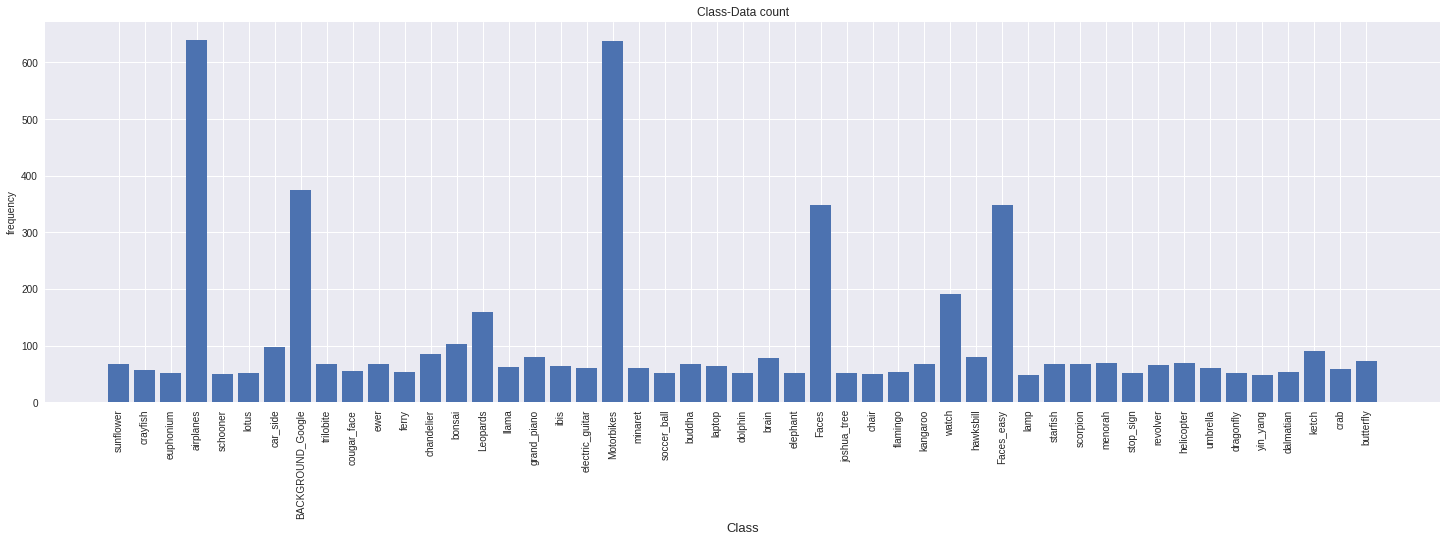

In [0]:

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,7))
index = np.arange(len(target_names))
bar_width = 1
plt.bar(index, count_total)
plt.xlabel('Class', fontsize=13,)
plt.ylabel('frequency', fontsize=10)
plt.xticks(index, target_names, fontsize=10, rotation=90,)
plt.title('Class-Data count')
plt.show()

In [0]:

cwd = os.getcwd()
path = cwd + "/101_ObjectCategories"
valid_exts = [".jpg", ".gif", ".png", ".jpeg"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))


[49] CATEGORIES ARE IN 
 /content/101_ObjectCategories


In [0]:

categories = sorted(os.listdir(path))
ncategories = len(categories)
imgs = []
labels = []

In [0]:
for i, category in enumerate(categories):
    iter = 0
    for f in os.listdir(path + "/" + category):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + category, f)
            img = scipy.misc.imresize(imread(fullpath), [128,128, 3])
            img = img.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            imgs.append(img) # NORMALIZE IMAGE 
            label_curr = i
            labels.append(label_curr)
        #iter = (iter+1)%10;
print ("Num imgs: %d" % (len(imgs)))
print ("Num labels: %d" % (len(labels)) )
print (ncategories)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


Num imgs: 5366
Num labels: 5366
49


In [0]:

seed = 7
np.random.seed(seed)
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size = 0.1)
X_train = np.stack(X_train, axis=0)
y_train = np.stack(y_train, axis=0)
X_test = np.stack(X_test, axis=0)
y_test = np.stack(y_test, axis=0)
print ("Num train_imgs: %d" % (len(X_train)))
print ("Num test_imgs: %d" % (len(X_test)))
# # one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes= y_test.shape[1]

Num train_imgs: 4829
Num test_imgs: 537


In [0]:

print(y_test.shape)
print(X_train[1,1,1,:])
print(y_train[1])
# normalize inputs from 0-255 to 0.0-1.0
print(X_train.shape)
print(X_test.shape)
X_train = X_train.transpose(0, 3, 1, 2)
X_test = X_test.transpose(0, 3, 1, 2)
print(X_train.shape)
print(X_test.shape)

import scipy.io as sio
data = {}
data['categories'] = categories
data['X_train'] = X_train
data['y_train'] = y_train
data['X_test'] = X_test
data['y_test'] = y_test


(537, 49)
[ 95.32 102.22 115.06]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
(4829, 128, 128, 3)
(537, 128, 128, 3)
(4829, 3, 128, 128)
(537, 3, 128, 128)


In [0]:

from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [0]:
model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=(3, 128, 128), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
epochs = 300
lrate = 0.0001
decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = SGD(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 128, 128)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 128, 128)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 64, 64)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 64, 64)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 32, 32)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 256, 32, 32)       295168    
__________

In [0]:

np.random.seed(seed)
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=epochs, batch_size=56, shuffle=True, callbacks=[earlyStopping])

Train on 4829 samples, validate on 537 samples
Epoch 1/300
4829/4829 [==============================] - 65s 13ms/step - loss: 3.8765 - acc: 0.0404 - val_loss: 3.8685 - val_acc: 0.1192
Epoch 2/300
4829/4829 [==============================] - 55s 11ms/step - loss: 3.8601 - acc: 0.0594 - val_loss: 3.8490 - val_acc: 0.1192
Epoch 3/300
4829/4829 [==============================] - 55s 11ms/step - loss: 3.8404 - acc: 0.0837 - val_loss: 3.8244 - val_acc: 0.1192
Epoch 4/300
4829/4829 [==============================] - 55s 11ms/step - loss: 3.8141 - acc: 0.1023 - val_loss: 3.7893 - val_acc: 0.1192
Epoch 5/300
4829/4829 [==============================] - 55s 11ms/step - loss: 3.7704 - acc: 0.1149 - val_loss: 3.7339 - val_acc: 0.1192
Epoch 6/300
4829/4829 [==============================] - 55s 11ms/step - loss: 3.7076 - acc: 0.1218 - val_loss: 3.6516 - val_acc: 0.1192
Epoch 7/300
4829/4829 [==============================] - 55s 11ms/step - loss: 3.6454 - acc: 0.1257 - val_loss: 3.5796 - val_acc: 0

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)                                                                                          

F1 Score: 59.03%


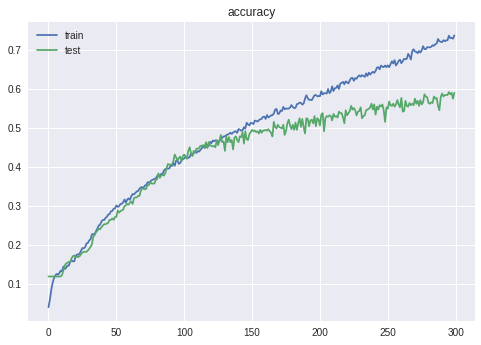

In [0]:
print("F1 Score: %.2f%%" % (scores[1]*100))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.savefig("accuracy7.png",dpi=300,format="png")

<Figure size 576x396 with 0 Axes>

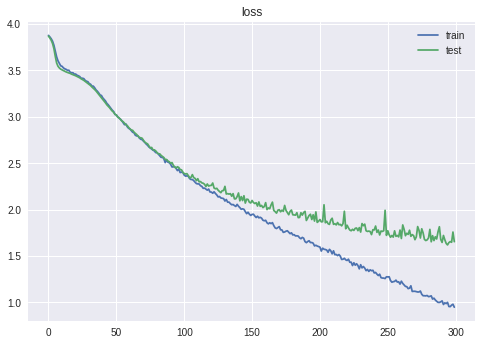

<Figure size 576x396 with 0 Axes>

In [0]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()

In [0]:
model_json = model.to_json()

In [0]:
with open("model7.json", "w") as json_file:
    json_file.write(model_json)
print('Saved json to disk')

Saved json to disk


In [0]:
model.save_weights("model7.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from google.colab import files

uploaded = files.upload()

Saving Object_classification_test_data.zip to Object_classification_test_data.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Object_classification_test_data.zip']), 'r')
data.extractall()
print('Files extracted sucessfully!')

Files extracted sucessfully!


In [0]:
from google.colab import files

uploaded = files.upload()

Saving object-recognition-predictions.csv to object-recognition-predictions.csv


In [0]:
import pandas as pd
import io
dataframe = pd.read_csv(io.StringIO(uploaded['object-recognition-predictions.csv'].decode('utf-8')))
dataframe.head()

,index,prediction
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path = 'Object_classification_test_data'
# path to model
model_path = 'model7.h5'
# dimensions of images
img_width, img_height = 128, 128

# load the trained model
model = load_model(model_path)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# load all images into a list
image_classes = []
ids=[]
for img in os.listdir(folder_path):
  
    img = image.load_img(img, target_size=(img_width, img_height))
    img = img.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    fname = os.path.basename(folder_path)
    fname.split(".")[-1]
    ids.append(fname)
    classes = model.predict_classes(img, batch_size=10)
    image_classes.append(classes)


In [0]:
df = pandas.DataFrame(data={"index": ids, "prediction": image_classes})
df.to_csv("object-recognition-predictions.csv", sep=',',index=False)

In [0]:
from google.colab import files

with open('object-recognition-predictions.csv', 'w') as f:
  f.write('Predicted class')

files.download('object-recognition-predictions.csv')